# Blending Ensemble

Blending is an ensemble learning technique that uses predictions from multiple models (for example ARIMA, knn or svm) to build a new model. This model is used for making predictions on the test set. Below is a step-wise explanation for a simple blending ensemble:

So we used a blending ensemble of 4 base learners, and it gave good results, mostly being better than any of the individual base learners and giving a lesser error rate.


## Import necessary libraries


In [0]:
!pip install -q quandl

In [0]:
import quandl
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16,8
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import csv
from csv import reader
from csv import writer

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16,8
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import csv
from csv import reader
from csv import writer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Import Dataset

In [4]:
df=pd.read_csv("final_dataset.csv",)
df

,Unnamed: 0,date,Category,high,low,open,close,volume,adj_close,comp,wr,moving_avg,RSI,stoch
0,0,01-07-2015,Transportation,312.700012,306.500000,308.799988,311.299988,2854143,303.809296,Adani Ports & SEZ,-22.580994,311.299988,0.000000,77.419006
1,1,02-07-2015,Transportation,319.000000,311.899994,312.450012,316.049988,8669541,308.445007,Adani Ports & SEZ,-23.600098,313.674988,0.000000,76.399902
2,2,03-07-2015,Transportation,325.750000,319.000000,319.950012,320.799988,5189498,313.080688,Adani Ports & SEZ,-25.714349,316.049988,0.000000,74.285651
3,3,06-07-2015,Transportation,321.100006,316.250000,316.950012,320.100006,2853145,312.397553,Adani Ports & SEZ,-29.350618,317.062492,0.000000,70.649382
4,4,07-07-2015,Transportation,334.700012,321.600006,321.799988,333.049988,7877450,325.035919,Adani Ports & SEZ,-5.851148,320.259991,93.137435,94.148852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58695,58695,01-04-2020,Media & Entertainment,126.750000,120.000000,124.000000,120.900001,6571413,120.900001,ZEEL,-91.958041,141.136667,30.112364,8.263475
58696,58696,03-04-2020,Media & Entertainment,125.949997,119.050003,123.000000,124.349999,7887911,124.349999,ZEEL,-87.604792,136.716668,31.874355,14.577463
58697,58697,07-04-2020,Media & Entertainment,143.000000,126.650001,129.000000,140.899994,11487040,140.899994,ZEEL,-62.112685,133.923334,39.689528,37.887315
58698,58698,08-04-2020,Media & Entertainment,148.149994,135.250000,138.000000,143.149994,10046602,143.149994,ZEEL,-58.943671,132.376666,40.680751,41.056329


In [0]:
df['date'] = pd.to_datetime(df.date,format='%d-%m-%Y')

In [6]:
df=df[df['comp']=='Tata Motors']
df
#df.to_csv('HCL_dataset_5year_final.csv', index=False)


,Unnamed: 0,date,Category,high,low,open,close,volume,adj_close,comp,wr,moving_avg,RSI,stoch
46960,46960,2015-07-01,Auto,447.399994,431.399994,436.750000,444.500000,6054910,444.320038,Tata Motors,-99.111020,1655.416650,0.000000,0.888980
46961,46961,2015-07-02,Auto,445.000000,435.000000,445.000000,436.399994,4641851,436.223328,Tata Motors,-99.660695,1575.419985,0.000000,0.339305
46962,46962,2015-07-03,Auto,436.000000,430.450012,436.000000,433.149994,3709457,432.974640,Tata Motors,-99.816895,1484.466654,0.000000,0.183105
46963,46963,2015-07-06,Auto,433.500000,420.700012,428.000000,431.100006,4600687,430.925476,Tata Motors,-99.299333,1401.893325,0.000000,0.700667
46964,46964,2015-07-07,Auto,435.700012,428.000000,434.350006,431.549988,5667938,431.375275,Tata Motors,-99.269017,1317.119989,0.000000,0.730983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48129,48129,2020-04-01,Auto,71.650002,67.550003,70.500000,67.949997,38149007,67.949997,Tata Motors,-85.828036,74.536666,22.688208,14.518750
48130,48130,2020-04-03,Auto,66.900002,64.800003,66.900002,65.300003,35346301,65.300003,Tata Motors,-94.127233,73.023333,21.678970,7.453428
48131,48131,2020-04-07,Auto,69.300003,66.900002,68.550003,67.250000,42066469,67.250000,Tata Motors,-84.472051,71.523333,24.332683,17.441860
48132,48132,2020-04-08,Auto,71.599998,65.400002,66.500000,67.599998,82179303,67.599998,Tata Motors,-80.930240,70.500000,24.822528,24.188786


In [0]:
#df.to_csv('HCL_dataset_5year_final.csv', index=False)


In [8]:
df.shape

(1174, 14)

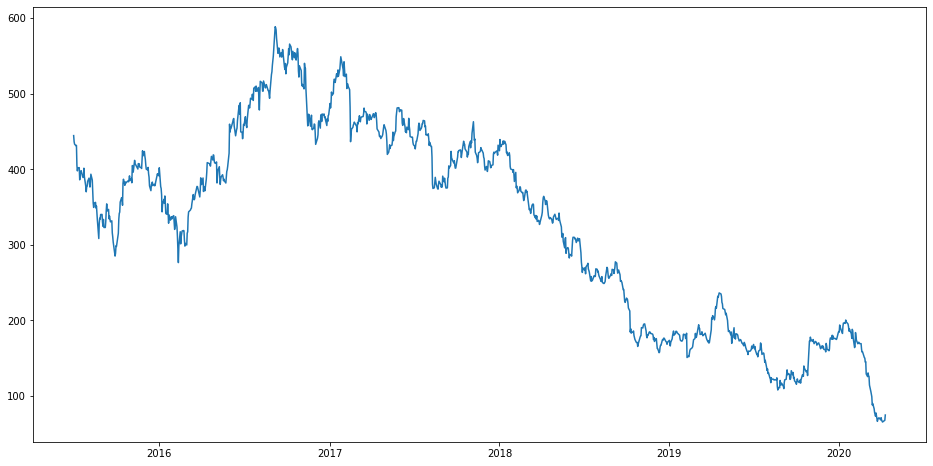

In [9]:
#plot
plt.plot(df['date'],df['close'], label='Close Price history')

In [10]:
# Get the Adjusted Close Price
df = df[['date','wr',	'moving_avg'	,'RSI',	'stoch','adj_close']]
#Take a look at the new data
print (df)


            date         wr   moving_avg        RSI      stoch   adj_close
46960 2015-07-01 -99.111020  1655.416650   0.000000   0.888980  444.320038
46961 2015-07-02 -99.660695  1575.419985   0.000000   0.339305  436.223328
46962 2015-07-03 -99.816895  1484.466654   0.000000   0.183105  432.974640
46963 2015-07-06 -99.299333  1401.893325   0.000000   0.700667  430.925476
46964 2015-07-07 -99.269017  1317.119989   0.000000   0.730983  431.375275
...          ...        ...          ...        ...        ...         ...
48129 2020-04-01 -85.828036    74.536666  22.688208  14.518750   67.949997
48130 2020-04-03 -94.127233    73.023333  21.678970   7.453428   65.300003
48131 2020-04-07 -84.472051    71.523333  24.332683  17.441860   67.250000
48132 2020-04-08 -80.930240    70.500000  24.822528  24.188786   67.599998
48133 2020-04-09 -34.513272    70.276667  33.980839  68.944096   74.599998

[1174 rows x 6 columns]


# Spliting data into Train, Cross Validation, Test split

In [0]:
X=df[['wr',	'moving_avg'	,'RSI',	'stoch']]
y=df['adj_close']
y=np.asarray(y)

In [0]:
X_train=X[:int(0.7*len(X))]
X_train_date=df['date'][:int(0.7*len(X))]
X_cv=X[int(0.7*len(X)):int(0.85*len(X))]
X_cv_date=df['date'][int(0.7*len(X)):int(0.85*len(X))]
X_test=X[int(0.85*len(X)):]
X_test_date=df['date'][int(0.85*len(X)):]
y_train=y[:int(0.7*len(y))]
y_cv=y[int(0.7*len(y)):int(0.85*len(y))]
y_test=y[int(0.85*len(y)):]

In [0]:
 minn=np.min(X_train)
 maxx=np.max(X_train)
 X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train))
 X_cv=(X_cv-minn)/(maxx-minn)
 X_test=(X_test-minn)/(maxx-minn)

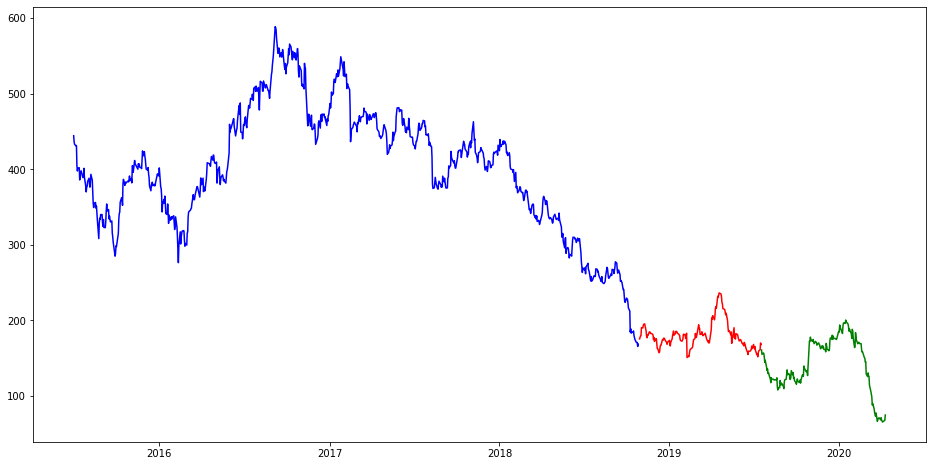

In [14]:
plt.plot(X_train_date,y_train, 'blue', label='Training Data')
plt.plot(X_cv_date,y_cv, 'red', label='Cross Validation')
plt.plot(X_test_date,y_test, 'green', label='Testing Data')

# BLENDING ENSEMBLE

The steps are:

1. The train set is split into training and validation sets.
2. Model(s) are fitted on the training set.
3. The predictions are made on the validation set and the test set.
4. The validation set and its predictions are used as features to build a new model.
5. This model is used to make final predictions on the test and meta-features.


# SVR (Support Vector Regression)
Support Vector regression is a type of Support vector machine that supports linear and non-linear regression.

The work of the SVM is to approximate the function we used to generate the training set as in a classification problem.

In [15]:
svr_lin  = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin.fit(X_train, y_train)
svr_poly.fit(X_train,y_train)
svr_rbf.fit(X_train,y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

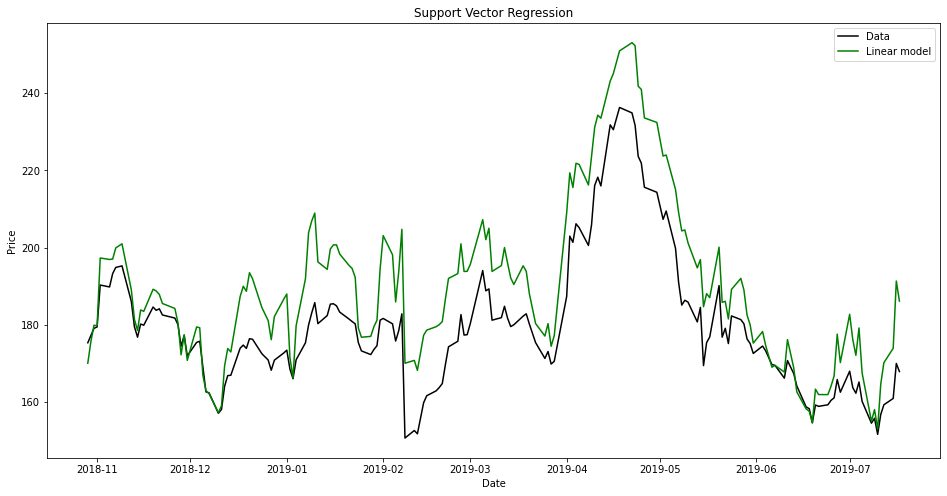

In [16]:
plt.plot(X_cv_date, y_cv, c='k', label='Data')
y_lin=svr_lin.predict(X_cv)
plt.plot(X_cv_date, y_lin, c='g', label='Linear model')
   
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

The most important SVR parameter is the Kernel type. 

It can be linear,polynomial or gaussian. 

We have a non-linear condition so we can select polynomial or gaussian but here we select RBF(a gaussian type) kernel.

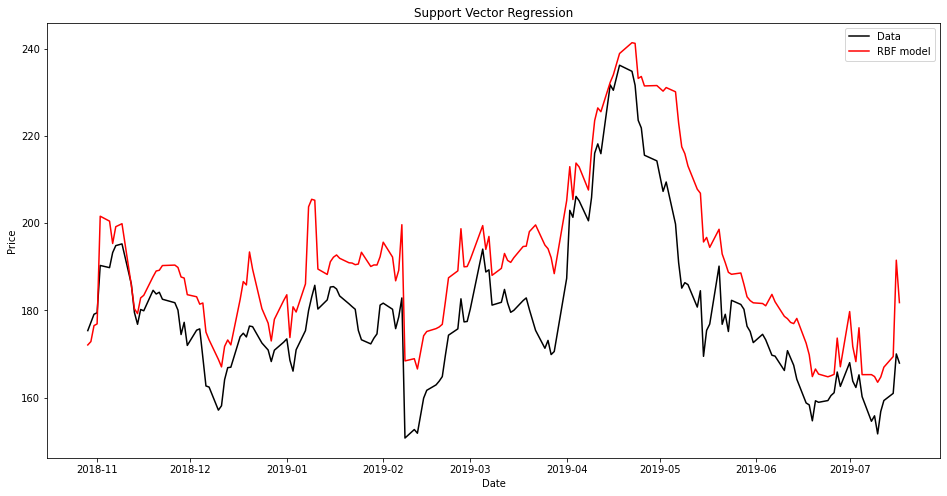

In [17]:
plt.plot(X_cv_date, y_cv, c='k', label='Data')
y_rbf=svr_rbf.predict(X_cv)
plt.plot(X_cv_date, y_rbf, c='r', label='RBF model') 

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

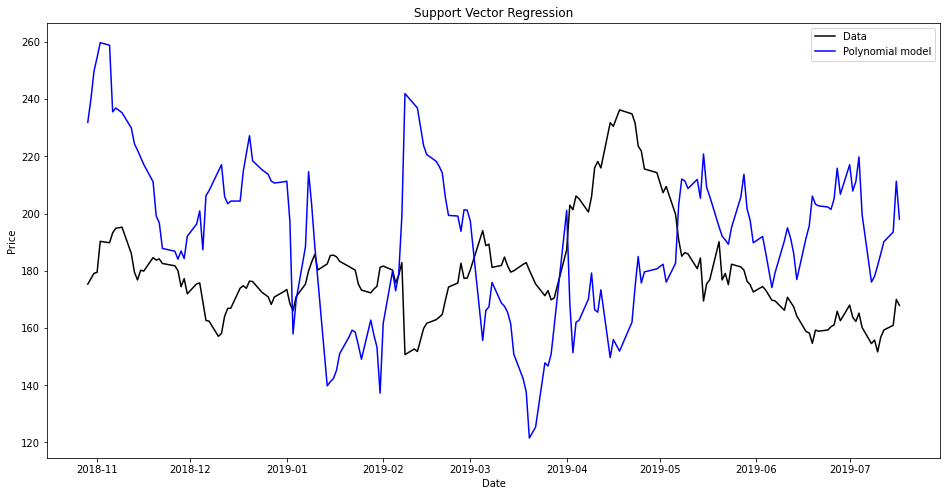

In [18]:
plt.plot(X_cv_date, y_cv, c='k', label='Data')
y_poly=svr_poly.predict(X_cv)
plt.plot(X_cv_date, y_poly, c='b', label='Polynomial model')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

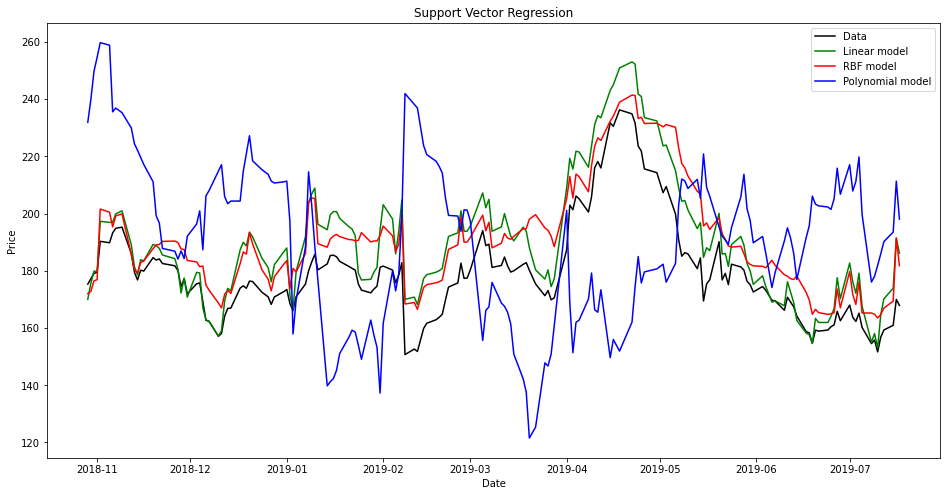

In [19]:
plt.plot(X_cv_date, y_cv, c='k', label='Data')
plt.plot(X_cv_date, svr_lin.predict(X_cv), c='g', label='Linear model')
plt.plot(X_cv_date, svr_rbf.predict(X_cv), c='r', label='RBF model') 
plt.plot(X_cv_date, svr_poly.predict(X_cv), c='b', label='Polynomial model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [20]:
# cving Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svr_confidence = svr_rbf.score(X_cv, y_cv)
print("RMS error: ",np.sqrt(np.mean(np.square(y_lin-y_cv))))
print("svr confidence: ", svr_confidence)

RMS error:  12.11682083223646
svr confidence:  0.41952582179871295


In [21]:
svr_confidence = svr_lin.score(X_cv, y_cv)
print("RMS error: ",np.sqrt(np.mean(np.square(y_rbf-y_cv))))
print("svr confidence: ", svr_confidence)

RMS error:  12.83778761005168
svr confidence:  0.4828936095002625


In [22]:
svr_confidence = svr_poly.score(X_cv, y_cv)
print("RMS error: ",np.sqrt(np.mean(np.square(y_poly-y_cv))))
print("svr confidence: ", svr_confidence)

RMS error:  38.36655690330543
svr confidence:  -4.184515598378383


#ARIMA (Auto-Regressive Integrated Moving Average )

ARIMA, short for ‘Auto-Regressive Integrated Moving Average’ is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.


Using the ARIMA model, you can forecast a time series using the series past values. And the stock market prediction is a time series, hence ARIMA works the best on it.


In [23]:
from sklearn.metrics import mean_squared_error

history =y_train
print(type(history))
predictions = np.array([])
for t in range(len(y_cv)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions=np.append(predictions,yhat)
    obs = y_cv[t]
    history=np.append(history,obs)
error = np.sqrt(np.mean(np.square(predictions-y_cv)))
print('RMS error: ',error)

<class 'numpy.ndarray'>
RMS error:  5.537431314955426


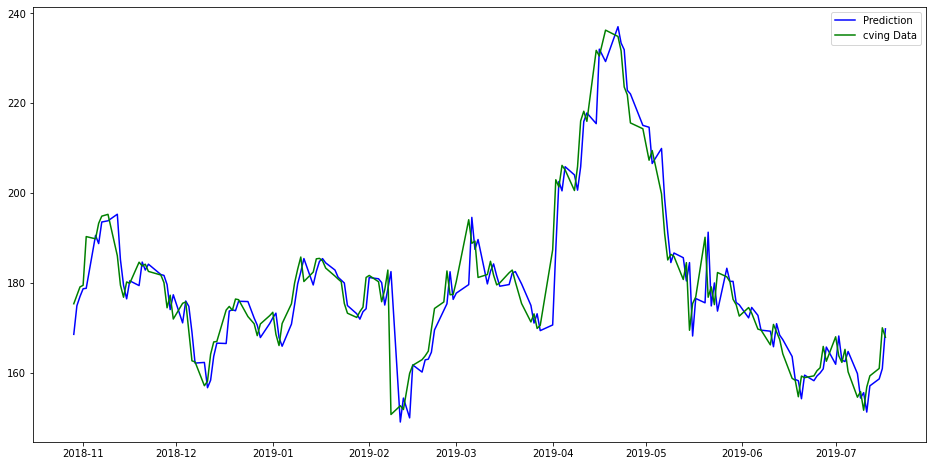

In [24]:
plt.plot(X_cv_date,predictions, 'blue', label='Prediction')
plt.plot(X_cv_date,y_cv, 'green', label='cving Data')
plt.legend()
plt.show()

# TEST PREDICTIONS

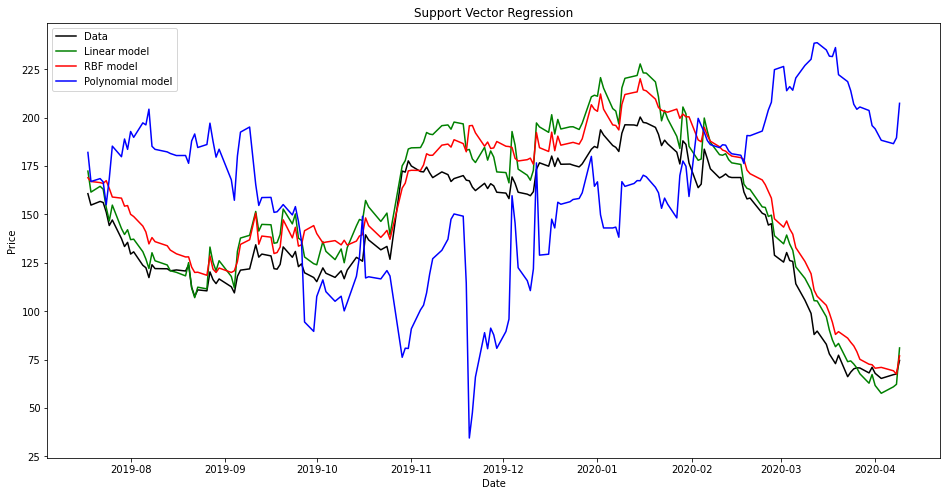

In [25]:
plt.plot(X_test_date, y_test, c='k', label='Data')
plt.plot(X_test_date, svr_lin.predict(X_test), c='g', label='Linear model')
plt.plot(X_test_date, svr_rbf.predict(X_test), c='r', label='RBF model') 
plt.plot(X_test_date, svr_poly.predict(X_test), c='b', label='Polynomial model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [26]:
# ing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svr_confidence = svr_rbf.score(X_test, y_test)
y_lin=svr_lin.predict(X_test)

print("RMS error: ",np.sqrt(np.mean(np.square(y_lin-y_test))))
print("svr confidence: ", svr_confidence)

RMS error:  14.401132896195602
svr confidence:  0.8146632577221846


In [27]:
svr_confidence = svr_lin.score(X_test, y_test)
y_rbf=svr_rbf.predict(X_test) 
print("RMS error: ",np.sqrt(np.mean(np.square(y_rbf-y_test))))
print("svr confidence: ", svr_confidence)

RMS error:  15.16946174055437
svr confidence:  0.8329623007626801


In [28]:
svr_confidence = svr_poly.score(X_test, y_test)
y_poly=svr_poly.predict(X_test)
print("RMS error: ",np.sqrt(np.mean(np.square(y_poly-y_test))))
print("svr confidence: ", svr_confidence)

RMS error:  66.97150024357744
svr confidence:  -2.612444958855388


**ARIMA**

In [29]:
from sklearn.metrics import mean_squared_error

history =y_train
print(type(history))
predictions_test = np.array([])
for t in range(len(y_test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions_test=np.append(predictions_test,yhat)
    obs = y_test[t]
    history=np.append(history,obs)
error = np.sqrt(np.mean(np.square(predictions_test-y_test)))
print('RMS error: ',error)

<class 'numpy.ndarray'>
RMS error:  6.23376842360134


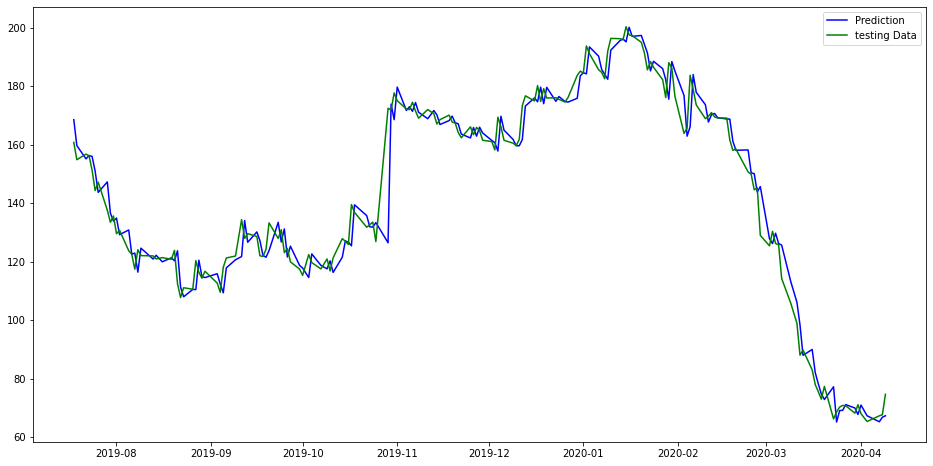

In [30]:
plt.plot(X_test_date,predictions_test, 'blue', label='Prediction')
plt.plot(X_test_date,y_test, 'green', label='testing Data')
plt.legend()
plt.show() # THIS IS FOR ARIMA  (ERROR GIVEN ABOVE)

In [31]:
df_val=pd.DataFrame({'svr_lin': svr_lin.predict(X_cv)[:], 'svr_rbf': svr_rbf.predict(X_cv)[:], 'svr_poly': svr_poly.predict(X_cv)[:]})

df_val.shape

(176, 3)

In [32]:

df_test=pd.DataFrame({'svr_lin': svr_lin.predict(X_test)[:], 'svr_rbf': svr_rbf.predict(X_test)[:], 'svr_poly': svr_poly.predict(X_test)[:]})

df_test.shape

(177, 3)

# TRAINING THE ENSEMBLE MODEL

In [0]:
from sklearn.linear_model import LogisticRegression
#import pandas.DataFrame.to_numpy as array

Y_cv=pd.DataFrame({'y_cv':y_cv[:]})
Y_test=pd.DataFrame({'y_test':y_test[:]})

#model = LogisticRegression()
#model.fit(df_val.to_numpy(),Y_cv.to_numpy())
#model.score(df_test,Y_test)

In [0]:
import statsmodels.api as sm

model = sm.OLS(Y_cv, df_val).fit()
#predictions = model.predict(X) # make the predictions by the model


In [0]:
pred_f = model.predict(df_test) # make the predictions by the model


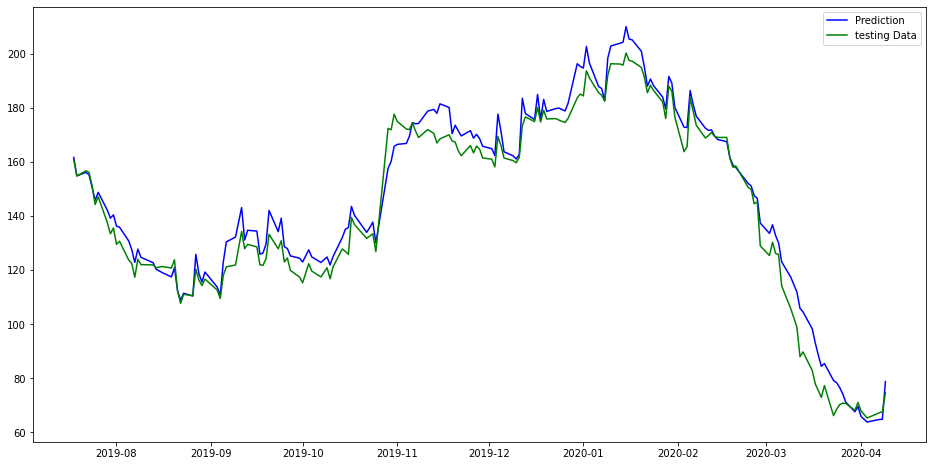

In [36]:
plt.plot(X_test_date,pred_f, 'blue', label='Prediction')
plt.plot(X_test_date,y_test, 'green', label='testing Data')
plt.legend()
plt.show()



In [37]:
error = np.sqrt(np.mean(np.square(pred_f-y_test))) #THIS IS FOR ENSEMBLE
print('RMS error: ',error)

RMS error:  6.2645318806744745
